In [4]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random

In [5]:
labels = {
    "0": 0, "1": 1, "2": 2, "3": 3, "4": 4, "5": 5, "6": 6, "7": 7, "8": 8, "9": 9,
    "A": 10, "B": 11, "C": 12, "D": 13, "E": 14, "F": 15, "G": 16, "H": 17, "I": 18,
    "J": 19, "K": 20, "L": 21, "M": 22, "N": 23, "O": 24, "P": 25, "Q": 26, "R": 27,
    "S": 28, "T": 29, "U": 30, "V": 31, "W": 32, "X": 33, "Y": 34, "Z": 35
}

In [6]:
''' 
directories = os.listdir('ISL_Dataset')
file_list = []
img_list = []
lbl_list = []

for directory in directories:
    dir_path = f"ISL_Dataset/{directory}"
    for files in os.listdir(f"ISL_Dataset/{directory}"):
        file_path = f"ISL_Dataset/{directory}/{files}"
        file_list.append(file_path)
        lbl_list.append(directory)
        img = imread(file_path)
        img_resized = cv2.resize(img, (64,64))
        img_list.append(np.array(img_resized))

data = pd.DataFrame({'file':file_list,'image':img_list,'label':lbl_list})
data.to_hdf('image_data.h5', key='df', mode='w')

'''


' \ndirectories = os.listdir(\'ISL_Dataset\')\nfile_list = []\nimg_list = []\nlbl_list = []\n\nfor directory in directories:\n    dir_path = f"ISL_Dataset/{directory}"\n    for files in os.listdir(f"ISL_Dataset/{directory}"):\n        file_path = f"ISL_Dataset/{directory}/{files}"\n        file_list.append(file_path)\n        lbl_list.append(directory)\n        img = imread(file_path)\n        img_resized = cv2.resize(img, (64,64))\n        img_list.append(np.array(img_resized))\n\ndata = pd.DataFrame({\'file\':file_list,\'image\':img_list,\'label\':lbl_list})\ndata.to_hdf(\'image_data.h5\', key=\'df\', mode=\'w\')\n\n'

In [7]:
data = pd.read_hdf('image_data.h5', 'df')

In [8]:
data.sample(10)

,file,image,label
35484,ISL_Dataset/T/1023.jpg,"[[[3, 2, 16], [4, 3, 17], [4, 6, 18], [6, 8, 2...",T
19886,ISL_Dataset/G/313.jpg,"[[[15, 15, 27], [15, 14, 28], [15, 14, 30], [1...",G
36318,ISL_Dataset/T/696.jpg,"[[[3, 7, 19], [4, 8, 20], [7, 10, 27], [9, 12,...",T
26906,ISL_Dataset/M/107.jpg,"[[[13, 15, 28], [15, 14, 30], [20, 19, 37], [3...",M
9963,ISL_Dataset/8/245.jpg,"[[[36, 34, 48], [41, 40, 54], [44, 43, 57], [4...",8
15674,ISL_Dataset/C/843.jpg,"[[[18, 19, 37], [16, 17, 35], [16, 17, 35], [1...",C
19326,ISL_Dataset/F/890.jpg,"[[[20, 18, 29], [21, 19, 32], [22, 20, 33], [2...",F
8642,ISL_Dataset/7/136.jpg,"[[[7, 6, 11], [5, 4, 9], [8, 7, 12], [10, 9, 1...",7
26297,ISL_Dataset/L/522.jpg,"[[[11, 14, 33], [11, 14, 31], [9, 12, 27], [9,...",L
956,ISL_Dataset/0/78.jpg,"[[[119, 92, 49], [118, 90, 49], [117, 88, 49],...",0


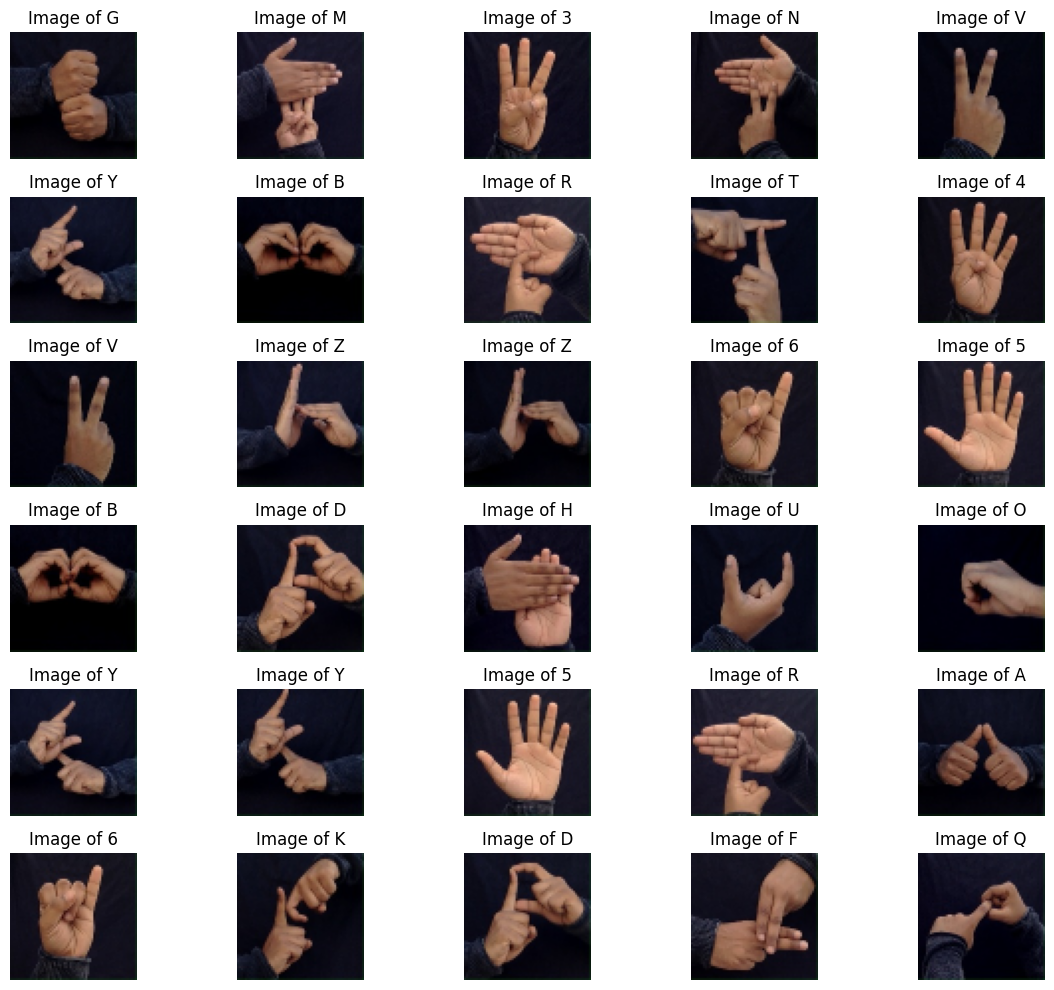

In [9]:
plt.figure(figsize=(12,10))
num_images = 30

# Randomly select indices from the DataFrame
random_indices = np.random.choice(len(data), num_images, replace=False)

# Iterate over selected indices to display images
for i, idx in enumerate(random_indices, 1):
    plt.subplot(6, 5, i)
    plt.axis('off')
    
    # Load image from the 'image' column (assuming it's already loaded as NumPy arrays)
    img = data['image'].iloc[idx]
    
    # Ensure image data type is uint8 (byte)
    img = img.astype(np.uint64)  
    
    # Display the image
    plt.imshow(img)
    
    # Get the corresponding label from the 'label' column
    label = data['label'].iloc[idx]
    
    # Set the title of the subplot
    plt.title(f'Image of {label}')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Count of Images by Sign')

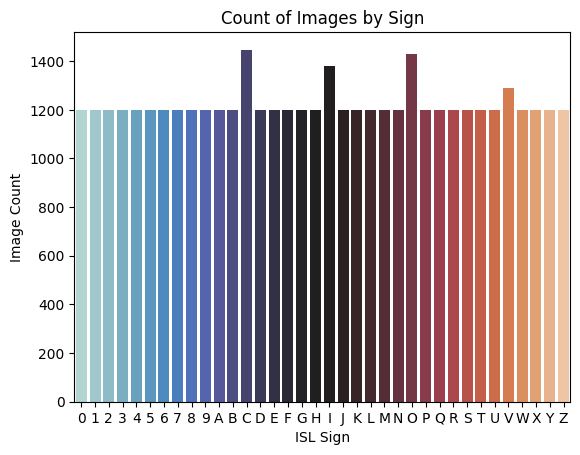

In [10]:
sign_freq = data['label'].value_counts().reset_index().sort_values('label')
sns.barplot(sign_freq, x='label', y='count', palette='icefire', hue='label')
plt.xlabel('ISL Sign')
plt.ylabel('Image Count')
plt.title('Count of Images by Sign')

In [11]:
data['image'][4613].shape

(64, 64, 3)

In [12]:
X = data['image']
X = [img.reshape(12288,) for img in X]
X = np.array(X)
y = data['label']
y = y.map(labels)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.66, random_state=42)

In [14]:
y_train.reset_index(drop=True, inplace=True)
y_val.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [15]:
'''
directories = os.listdir('Data')
file_list = []
img_list = []
lbl_list = []

for directory in directories:
    dir_path = f"Data/{directories}"
    for sub_directory in os.listdir(f"Data/{directory}"):
        subdir_path = f"Data/{directory}/{sub_directory}"
        for files in os.listdir(f"Data/{directory}/{sub_directory}"):
            file_path = f"Data/{directory}/{sub_directory}/{files}"
            file_list.append(file_path)
            lbl_list.append(directory)
            img = cv2.imread(file_path)
            img_list.append(np.array(img))
        
    

print(file_list)
print(img_list)
'''

'\ndirectories = os.listdir(\'Data\')\nfile_list = []\nimg_list = []\nlbl_list = []\n\nfor directory in directories:\n    dir_path = f"Data/{directories}"\n    for sub_directory in os.listdir(f"Data/{directory}"):\n        subdir_path = f"Data/{directory}/{sub_directory}"\n        for files in os.listdir(f"Data/{directory}/{sub_directory}"):\n            file_path = f"Data/{directory}/{sub_directory}/{files}"\n            file_list.append(file_path)\n            lbl_list.append(directory)\n            img = cv2.imread(file_path)\n            img_list.append(np.array(img))\n        \n    \n\nprint(file_list)\nprint(img_list)\n'

In [16]:
X_train.shape

(30761, 12288)

In [17]:
X_train = X_train/255.0
X_test = X_test/255.0
X_val = X_val/255.0

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Define the model architecture
model = Sequential([ 
    Dense(128, activation='relu'),
    Dense(36, activation='softmax')  
])

In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val), 
                    epochs=5, 
                    batch_size=32)

Epoch 1/5
962/962 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 0.9219 - loss: 0.3985 - val_accuracy: 0.9911 - val_loss: 0.0493
Epoch 2/5
962/962 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9970 - loss: 0.0178 - val_accuracy: 0.9993 - val_loss: 0.0034
Epoch 3/5
962/962 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9973 - loss: 0.0128 - val_accuracy: 0.9873 - val_loss: 0.1012
Epoch 4/5
962/962 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 0.9960 - loss: 0.0264 - val_accuracy: 1.0000 - val_loss: 1.2996e-04
Epoch 5/5
962/962 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9984 - loss: 0.0081 - val_accuracy: 1.0000 - val_loss: 2.6102e-04


In [21]:
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)

272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
962/962 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [22]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
train_loss, train_accuracy = model.evaluate(X_train, y_train)
val_loss, val_accuracy = model.evaluate(X_val,y_val)

272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9993 - loss: 8.9948e-04
962/962 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9998 - loss: 4.3733e-04
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 2.5019e-04


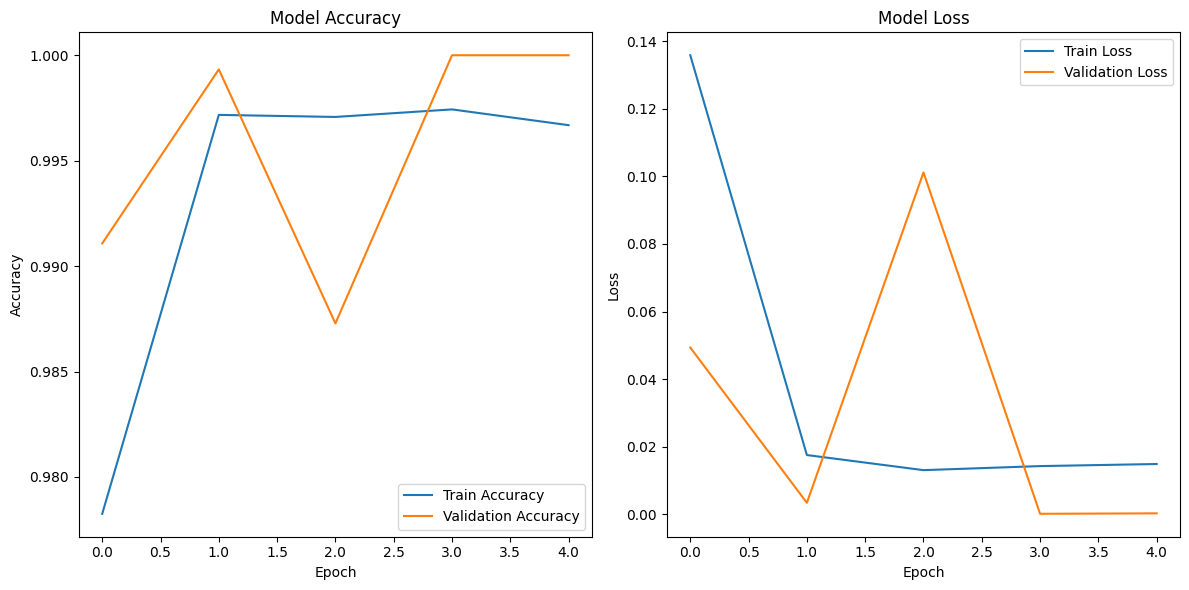

In [23]:
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [24]:
y_pred_labels = np.argmax(y_pred, axis=1)

In [25]:
incorrect_predictions = np.sum(y_pred_labels != y_test)
print(incorrect_predictions)

4


In [26]:
incorrect_indices = np.where(y_pred_labels != y_test)[0]

In [27]:
label_map = {
    0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9',
    10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I',
    19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R',
    28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z'
}
y_pred_labels_mapped = [label_map[label] for label in y_pred_labels]

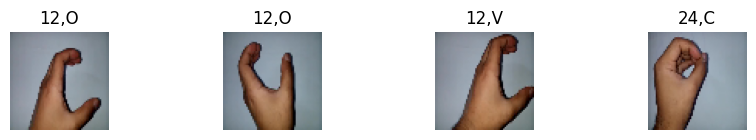

In [28]:
plt.figure(figsize=(16,12))
count = 1
for i in incorrect_indices:
    plt.subplot(8,6,count)   
    plt.axis('off')
    plt.imshow(X_test[i].reshape(64,64,3))
    plt.title(f'{y_test[i]},{y_pred_labels_mapped[i]}')
    count += 1